# 5.  Explore and Compare

## Steps:

 - Pick a dataset
 - Generate single variable histogram and box plot (or violin plot, if you'd prefer)
 - Check it for skewedness / requirement to subset.
 - Prepare the data (pivot, subset, summarize, create log column as required)
 - Regenerate the charts at 2 with the amended dataset.
 - Introduce a further categorical variable and generate a comparison bar chart.
 - Using Cowplot, generate a set of charts with a multiple density chart, multiple box plot and multiple bar chart.
 - Evaluate your charts using Gestalt and Accent.
 

## Part 1. Pick a dataset
- Find a dataset with categorical and numeric data - e.g.:
     - olympics.csv (note: you may need to subset on the countries (denoted as NOC) who won medals)
        -  df %>%  group_by(var1) %>%  mutate(var1_count = n())
     - vgsales.csv (note: if the data is too skewed, use the log of the data 
        -  log(df\$column))
     - SCGOP2016.csv. This is a dataset showing the number of votes cast for each candidate per county in the 2016 Republican (GOP) primaries in 2016. Hint: limit the number of candidates to the three who got the most votes.
   

In [5]:
mydata = file.path("C:","Users","markc","Desktop","DataVisuals","datasets")

datapath <-file.path(mydata,'vgsales.csv')
df<-read.csv(datapath)
head(df)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
6,6,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26


## Part 2. Check and generate
 - Generate single variable histogram and box plot (or violin plot, if you'd prefer)
 - Check it for skewedness / requirement to subset.
 - Prepare the data (pivot, subset, summarize, create log column as required)
 - Regenerate the charts at 2 with the amended dataset.
 - Introduce a further categorical variable and generate a comparison bar chart.
 - Using Cowplot, generate a set of charts with a multiple density chart, multiple box plot and multiple bar chart.

In [14]:
lst <- sort(df$Global_Sales)  #  Replace df$column with your own column
# Set plot size
options(repr.plot.width=10, repr.plot.height=6)  # You can adjust the size as needed

# Your plotting code here


In [12]:
# Calculate median, quantile list and inter-quantile range
median <- median(lst)
qs <-quantile (lst)
IQR <- IQR(lst)
print(paste0("Inter Quartile Range Global Sales ", IQR, " million units"))
print("Quantile Global Sales ")
qs
# To get min and max, calculate 1.5 x IQR.  

calc <- IQR * 1.5

print(paste0("IQR*1.5 = ",calc))
# The max value is the highest value inside the 3rd quartile, plus 1.5 x IQR.  

maxinq2 <- max(lst[lst<qs[4]])
max <- maxinq2+calc
print(paste0("max = ", max))

# The min value is the highest value inside the 1st quartile, minus 1.5 x IQR.  
maxinq1 <- max(lst[lst<qs[2]])
min <- maxinq1 - calc

print(paste0("min = ", min))

[1] "Inter Quartile Range Global Sales 0.41 million units"
[1] "Quantile Global Sales "


0%   25%   50%   75%  100% 
 0.01  0.06  0.17  0.47 82.74

[1] "IQR*1.5 = 0.615"
[1] "max = 1.075"
[1] "min = -0.565"


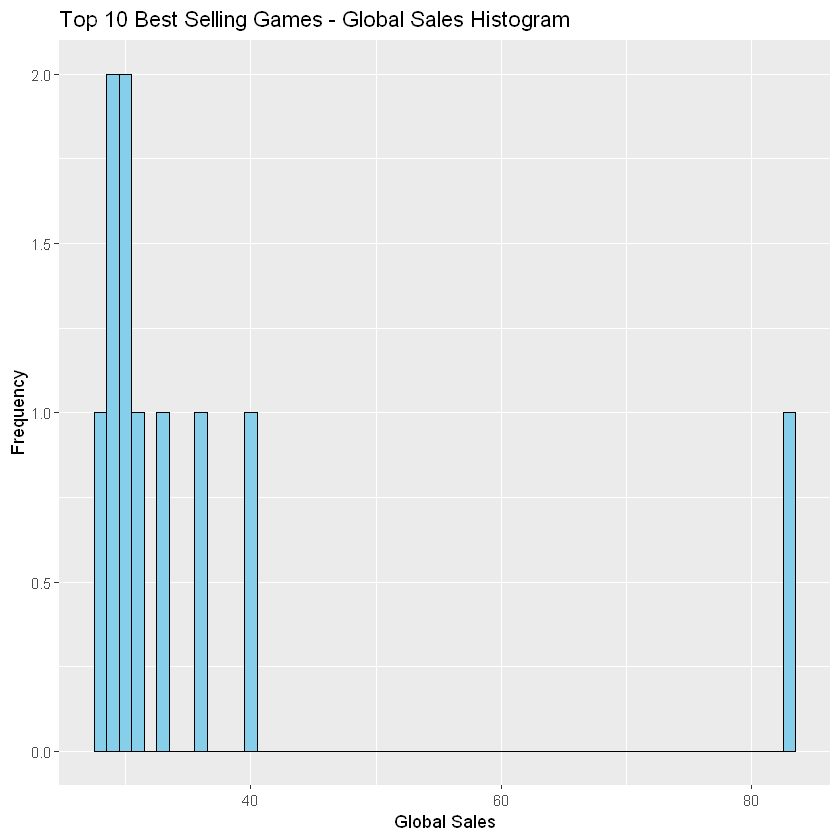

In [14]:
# Load the ggplot2 library
library(ggplot2)

# Assuming 'df' is your dataframe
# Replace 'df' with the actual name of your dataframe if it's different

# Sort the dataframe by 'Global_Sales' in descending order and select the top 10 rows
top_10_df <- head(df[order(-df$Global_Sales), ], 10)

# Create the histogram
ggplot(top_10_df, aes(x = Global_Sales)) +
  geom_histogram(binwidth = 1, fill = "skyblue", color = "black") +
  labs(title = "Top 10 Best Selling Games - Global Sales Histogram", x = "Global Sales", y = "Frequency")


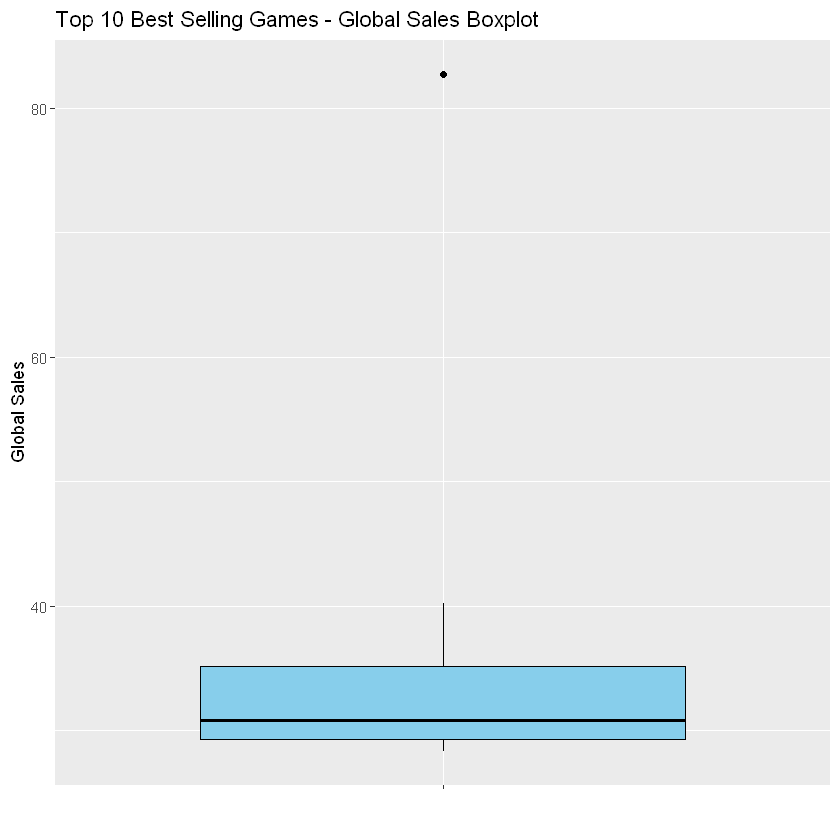

In [17]:
# Load the ggplot2 library
library(ggplot2)

# Assuming 'df' is your dataframe
# Replace 'df' with the actual name of your dataframe if it's different

# Sort the dataframe by 'Global_Sales' in descending order and select the top 10 rows
top_10_df <- head(df[order(-df$Global_Sales), ], 10)

# Create the box plot
ggplot(top_10_df, aes(x = "", y = Global_Sales)) +
  geom_boxplot(fill = "skyblue", color = "black") +
  labs(title = "Top 10 Best Selling Games - Global Sales Boxplot", x = "", y = "Global Sales")


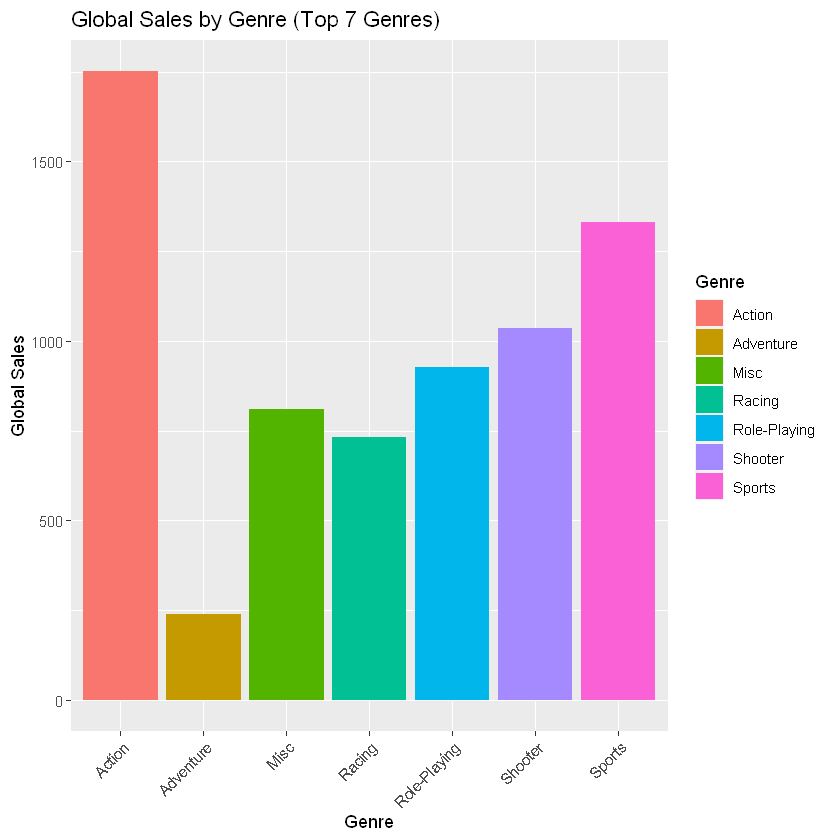

In [18]:
# Load the ggplot2 library
library(ggplot2)

# Assuming 'df' is your dataframe
# Replace 'df' with the actual name of your dataframe if it's different

# Get the top 7 genres
top_7_genres <- head(names(sort(table(df$Genre), decreasing = TRUE)), 7)

# Filter the dataframe to include only the top 7 genres
df_top_7_genres <- df[df$Genre %in% top_7_genres, ]

# Aggregate global sales by genre
genre_sales <- aggregate(Global_Sales ~ Genre, data = df_top_7_genres, sum)

# Create the bar chart
ggplot(genre_sales, aes(x = Genre, y = Global_Sales, fill = Genre)) +
  geom_bar(stat = "identity") +
  labs(title = "Global Sales by Genre (Top 7 Genres)", x = "Genre", y = "Global Sales") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"


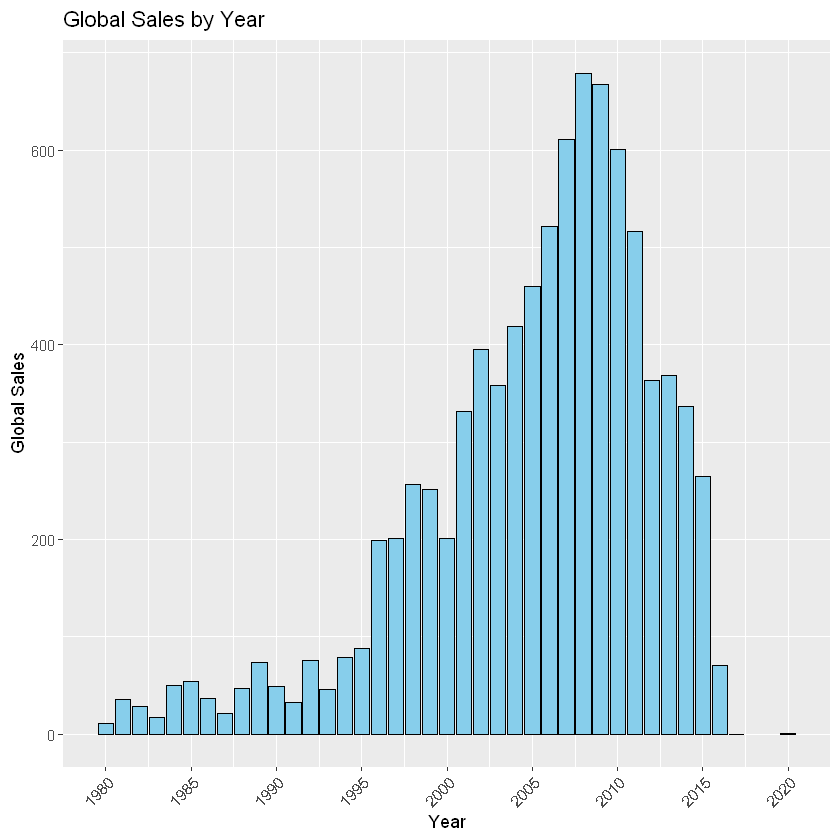

In [29]:
# Load the ggplot2 library
library(ggplot2)

# Assuming 'df' is your dataframe
# Replace 'df' with the actual name of your dataframe if it's different

# Convert 'Year' to integer type
df$Year <- as.integer(df$Year)

# Aggregate global sales by year
yearly_sales <- aggregate(Global_Sales ~ Year, data = df, sum)

# Create the bar chart
ggplot(yearly_sales, aes(x = Year, y = Global_Sales)) +
  geom_bar(stat = "identity", fill = "skyblue", color = "black") +
  labs(title = "Global Sales by Year", x = "Year", y = "Global Sales") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_x_continuous(breaks = seq(min(yearly_sales$Year), max(yearly_sales$Year), by = 5), labels = as.character)


Warning message:
"Removed 271 rows containing non-finite values (`stat_density()`)."


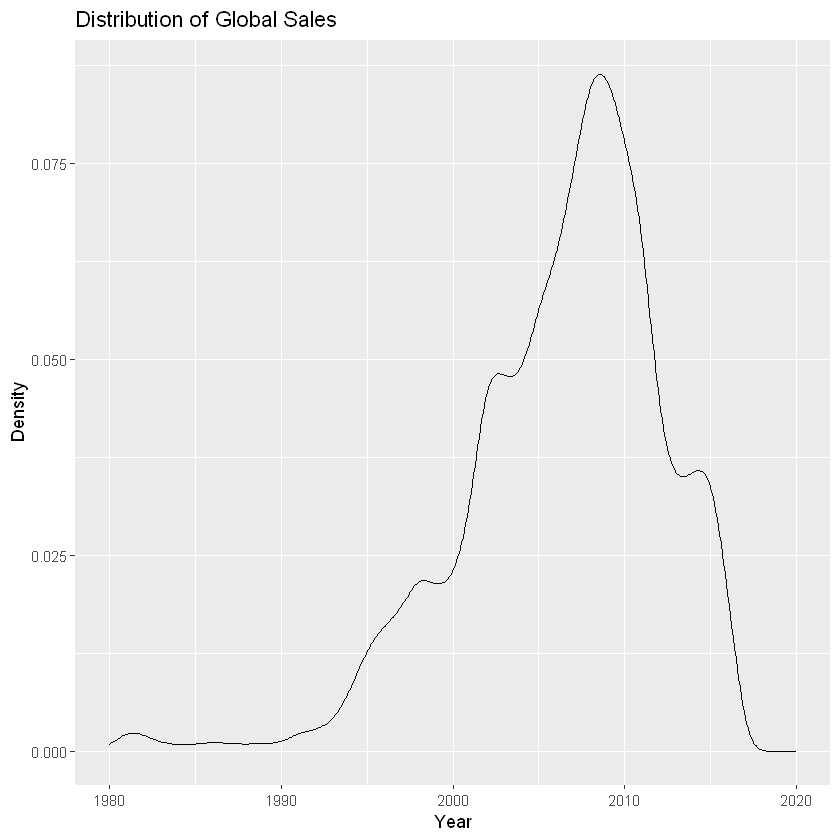

In [44]:
# Load the ggplot2 and cowplot libraries
library(ggplot2)
library(cowplot)

# Assuming 'df' is your dataframe
# Replace 'df' with the actual name of your dataframe if it's different

# Convert 'Year' to integer type
df$Year <- as.integer(df$Year)

# Aggregate global sales by year
yearly_sales <- aggregate(Global_Sales ~ Year, data = df, sum)


# Create the distribution plot (density plot)
density_plot <- ggplot(df, aes(x = Year)) +
  geom_density( alpha = 1.0) +
  labs(title = "Distribution of Global Sales", x = "Year", y = "Density")

density_plot


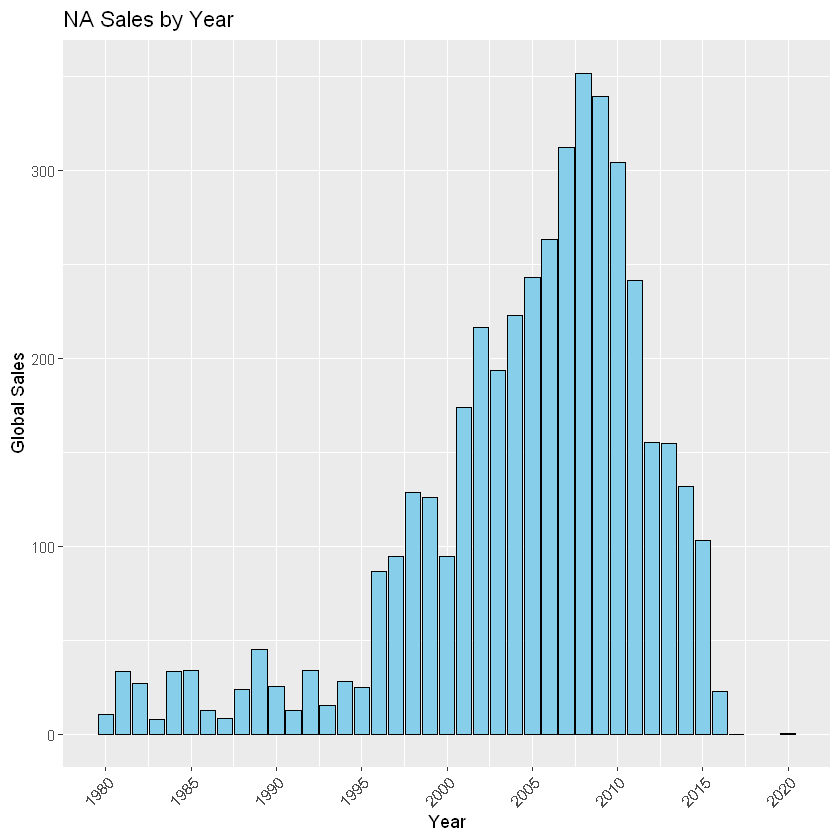

In [49]:
# Load the ggplot2 library
library(ggplot2)

# Assuming 'df' is your dataframe
# Replace 'df' with the actual name of your dataframe if it's different

# Convert 'Year' to integer type
df$Year <- as.integer(df$Year)

# Aggregate global sales by year
yearly_sales <- aggregate(NA_Sales ~ Year, data = df, sum)

# Create the bar chart
ggplot(yearly_sales, aes(x = Year, y = NA_Sales)) +
  geom_bar(stat = "identity", fill = "skyblue", color = "black") +
  labs(title = "NA Sales by Year", x = "Year", y = "Global Sales") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_x_continuous(breaks = seq(min(yearly_sales$Year), max(yearly_sales$Year), by = 5), labels = as.character)




Warning message:
"Removed 271 rows containing non-finite values (`stat_density()`)."


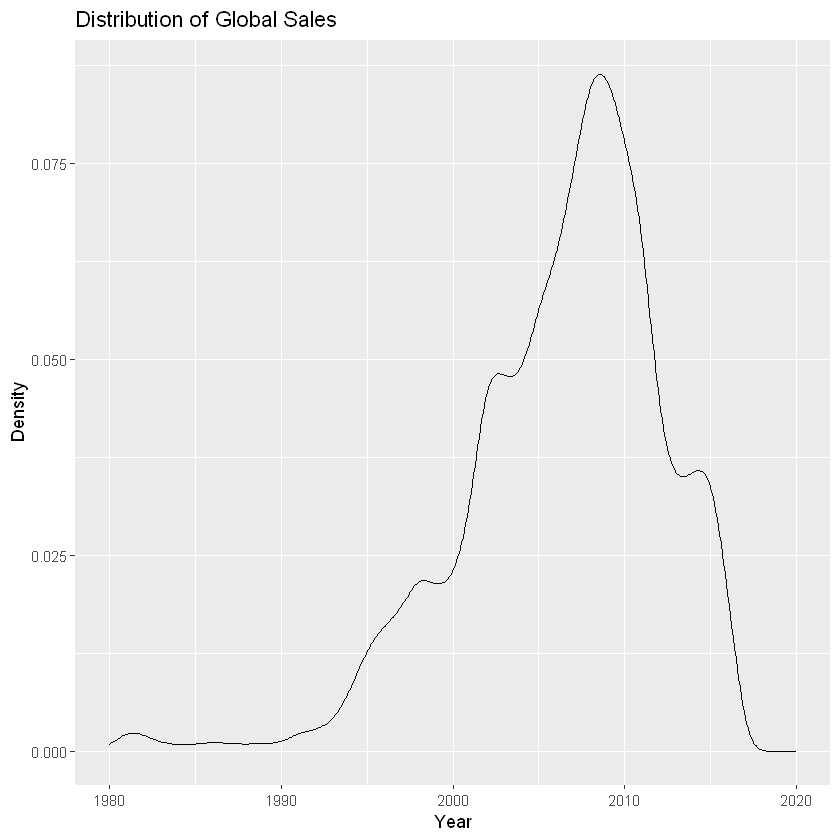

In [50]:
# Load the ggplot2 and cowplot libraries
library(ggplot2)
library(cowplot)

# Assuming 'df' is your dataframe
# Replace 'df' with the actual name of your dataframe if it's different

# Convert 'Year' to integer type
df$Year <- as.integer(df$Year)

# Aggregate global sales by year
yearly_sales <- aggregate(NA_Sales ~ Year, data = df, sum)


# Create the distribution plot (density plot)
density_plot <- ggplot(df, aes(x = Year)) +
  geom_density( alpha = 1.0) +
  labs(title = "Distribution of Global Sales", x = "Year", y = "Density")

density_plot


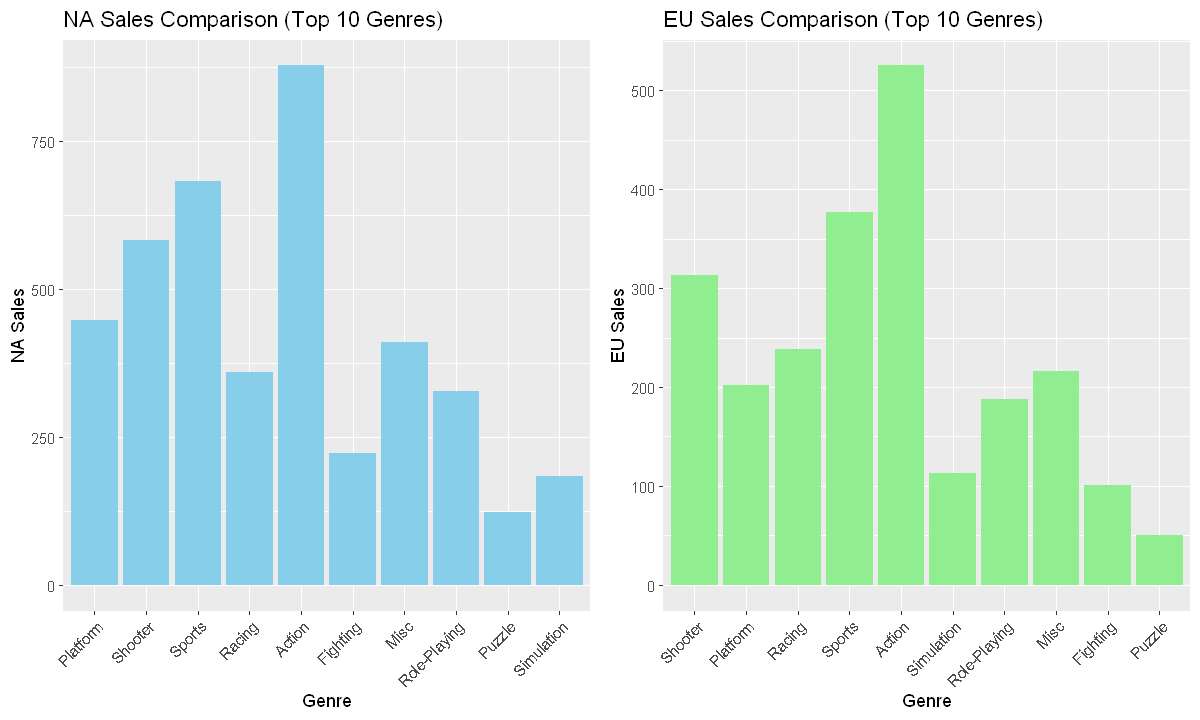

In [15]:
# Load required libraries
library(cowplot)
library(ggplot2)

# Assuming you already have the dataframe df

# Calculate total sales for each genre
genre_sales <- aggregate(df[c("NA_Sales", "EU_Sales")], by = list(Genre = df$Genre), FUN = sum)

# Sort genres by total global sales in descending order
top_genres <- genre_sales[order(-genre_sales$NA_Sales), ]

# Select top 10 genres
top_10_genres <- head(top_genres$Genre, 10)

# Filter dataframe for top 10 genres
df_top_10 <- df[df$Genre %in% top_10_genres, ]

# Plot for NA Sales
na_sales_plot <- ggplot(data = df_top_10, aes(x = reorder(Genre, -NA_Sales), y = NA_Sales)) +
  geom_bar(stat = "identity", fill = "skyblue") +
  labs(x = "Genre", y = "NA Sales", title = "NA Sales Comparison (Top 10 Genres)") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))  # Rotate x-axis labels for better readability

# Plot for EU Sales
eu_sales_plot <- ggplot(data = df_top_10, aes(x = reorder(Genre, -EU_Sales), y = EU_Sales)) +
  geom_bar(stat = "identity", fill = "lightgreen") +
  labs(x = "Genre", y = "EU Sales", title = "EU Sales Comparison (Top 10 Genres)") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))  # Rotate x-axis labels for better readability

# Combine plots
combined_plots <- plot_grid(na_sales_plot, eu_sales_plot, nrow = 1)

# Show combined plots
print(combined_plots)


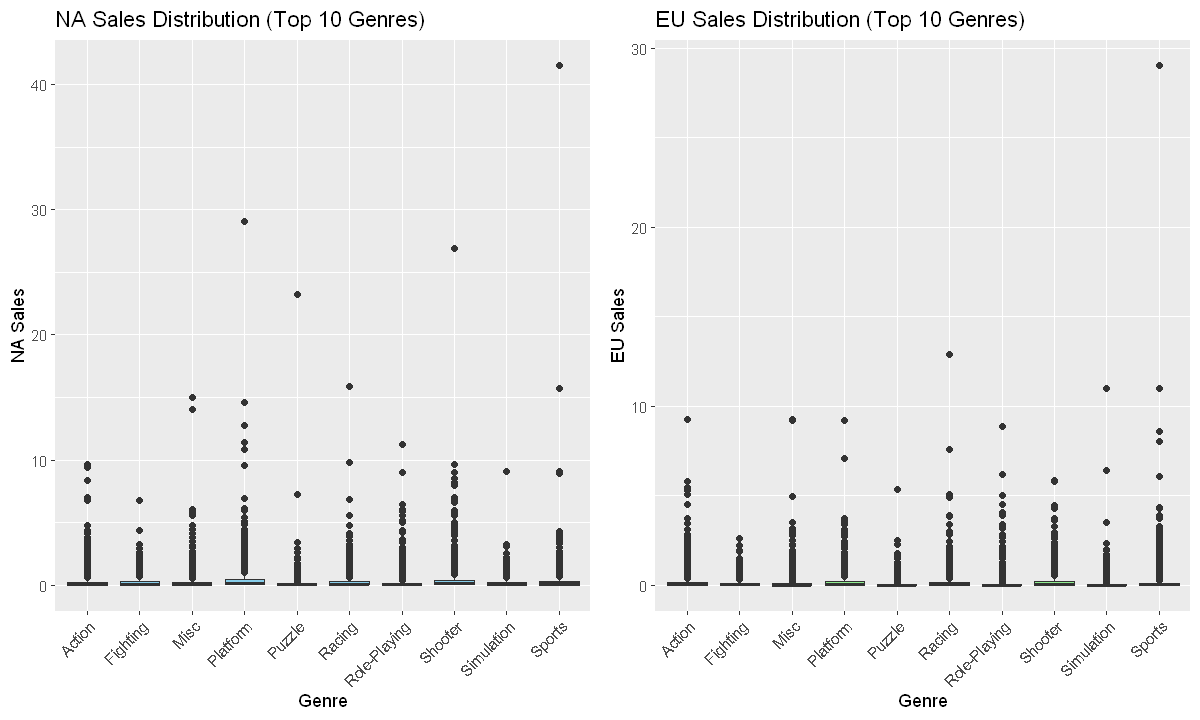

In [16]:
# Boxplot for NA Sales
na_sales_boxplot <- ggplot(data = df_top_10, aes(x = Genre, y = NA_Sales)) +
  geom_boxplot(fill = "skyblue") +
  labs(x = "Genre", y = "NA Sales", title = "NA Sales Distribution (Top 10 Genres)") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))  # Rotate x-axis labels for better readability

# Boxplot for EU Sales
eu_sales_boxplot <- ggplot(data = df_top_10, aes(x = Genre, y = EU_Sales)) +
  geom_boxplot(fill = "lightgreen") +
  labs(x = "Genre", y = "EU Sales", title = "EU Sales Distribution (Top 10 Genres)") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))  # Rotate x-axis labels for better readability

# Combine boxplots
combined_boxplots <- plot_grid(na_sales_boxplot, eu_sales_boxplot, nrow = 1)

# Show combined boxplots
print(combined_boxplots)


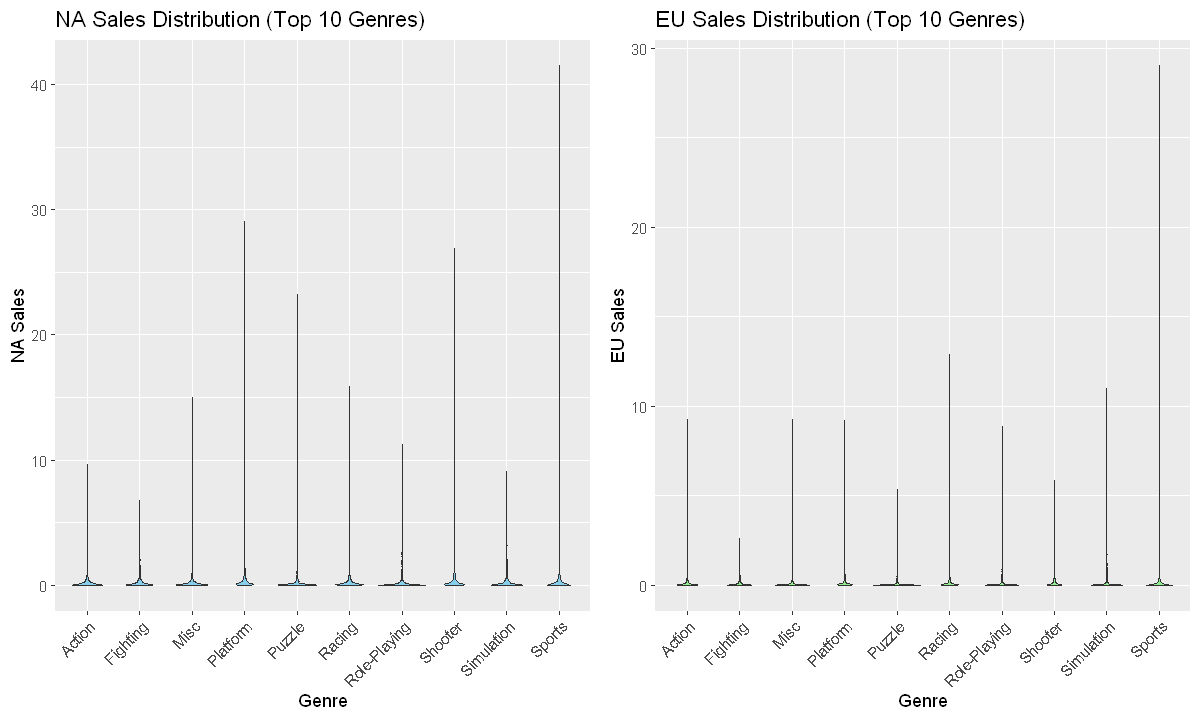

In [17]:
# Violin plot for NA Sales
na_sales_violin <- ggplot(data = df_top_10, aes(x = Genre, y = NA_Sales)) +
  geom_violin(fill = "skyblue") +
  labs(x = "Genre", y = "NA Sales", title = "NA Sales Distribution (Top 10 Genres)") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))  # Rotate x-axis labels for better readability

# Violin plot for EU Sales
eu_sales_violin <- ggplot(data = df_top_10, aes(x = Genre, y = EU_Sales)) +
  geom_violin(fill = "lightgreen") +
  labs(x = "Genre", y = "EU Sales", title = "EU Sales Distribution (Top 10 Genres)") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))  # Rotate x-axis labels for better readability

# Combine violin plots
combined_violin_plots <- plot_grid(na_sales_violin, eu_sales_violin, nrow = 1)

# Show combined violin plots
print(combined_violin_plots)


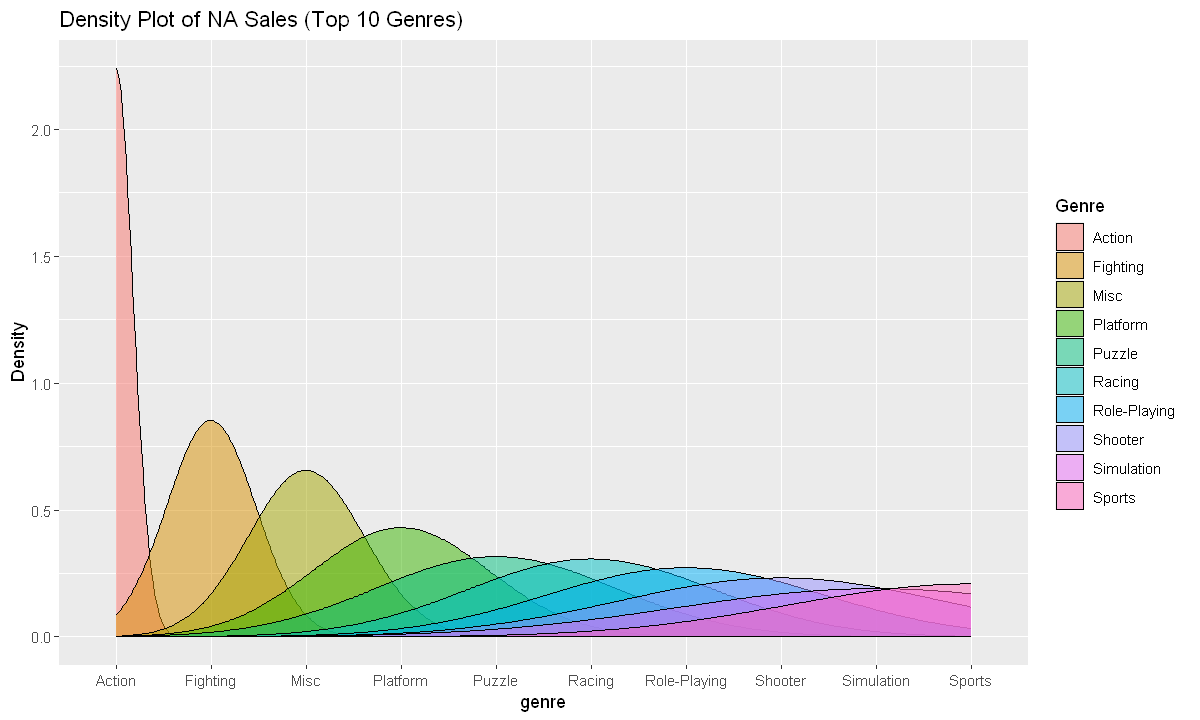

In [19]:
# Density plot for NA Sales
na_sales_density <- ggplot(data = df_top_10, aes(x = Genre, fill = Genre)) +
  geom_density(alpha = 0.5) +
  labs(x = "genre", y = "Density", title = "Density Plot of NA Sales (Top 10 Genres)")




na_sales_density


##  PART THREE
  - Evaluate your charts using Gestalt and Accent.

## Gestalt:

 - Proximity
 - Similarity
 - Enclosure
 - Figure Ground
 - Closure
 - Continuity
 - Connection
 - Focal point

## ACCENT

 - Apprehension
 - Clarity
 - Consistency
 - Efficiency
 - Necessity
 - Truthfulness



In [ ]:
Firstly, I've leveraged the principle of proximity to group bars representing the same genre closely together, allowing viewers to effortlessly associate each bar with its respective genre.

In maintaining similarity, I've employed consistent colors and shapes for bars of the same genre, enhancing their visual cohesion while effectively distinguishing them from bars of other genres.

The histogram is framed within a clear boundary, demonstrating enclosure, which not only separates it from surrounding elements but also provides a sense of containment and focus.

To ensure optimal figure-ground contrast, I've carefully selected colors that make the bars stand out prominently against the background, thereby enhancing readability and visual impact.

Moreover, I've adhered to the principle of closure, guaranteeing a visually complete histogram devoid of any gaps or inconsistencies that could potentially confuse viewers.

By arranging the bars in a logical order, such as alphabetically or by frequency, I've maintained continuity, facilitating smooth visual flow and effortless interpretation of the data.

The judicious use of lines and visual cues, in alignment with the principle of connection, serves to enhance coherence and provide additional context without overwhelming the plot.

Furthermore, I've strategically emphasized key insights using size variations or contrasting colors, effectively drawing attention to critical aspects of the distribution and embodying the principle of focal point.

Through meticulous consideration of accent, I've employed subtle visual enhancements to underscore important features and highlight noteworthy trends, thereby enriching the viewer's understanding of the data.

In crafting the histogram, I've prioritized apprehension, ensuring that it is intuitively understandable at a glance, with clear labels and a succinct title that succinctly encapsulates the main message it conveys.

Additionally, I've upheld clarity by adopting a minimalist design approach, eschewing unnecessary embellishments in favor of a clean and uncluttered aesthetic that enhances comprehension.

Consistency in style, color schemes, and visual elements has been meticulously maintained throughout the plot, underscoring the principle of consistency and contributing to a cohesive visual presentation.

Efficiency in conveying information has been a guiding principle, with every element thoughtfully positioned to optimize space and minimize clutter, thus embodying the essence of efficiency.

I've ensured that every element included in the plot serves a meaningful purpose, adhering to the principle of necessity and eschewing extraneous details that could detract from its effectiveness.

Lastly, the design faithfully represents the underlying data, with no misleading visualizations or distortions, thereby upholding the principle of truthfulness and fostering trust and credibility in the information presented.

In summary, the resulting histogram is not only visually captivating but also highly informative, embodying a harmonious blend of Gestalt principles and design fundamentals to deliver a compelling representation of the distribution of game genres.